**-- THIS IS THE ACTUAL PROGRAM --**

In [ ]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import glob
import imageio.v3 as iio

In [1]:
class NeuralNetwork:
  def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
    # Initialize the neural network with the number of nodes in each layer and the learning rate
    self.input_nodes = input_nodes
    self.hidden_nodes = hidden_nodes
    self.output_nodes = output_nodes
    self.learning_rate = learning_rate

    # Initialize weights with a normal distribution
    self.weights_input_to_hidden = np.random.normal(0.0, pow(self.input_nodes, -0.5),
                                                 (self.hidden_nodes, self.input_nodes))
    self.weights_hidden_to_output = np.random.normal(0.0, pow(self.hidden_nodes, -0.5),
                                                     (self.output_nodes, self.hidden_nodes))

    # Define the sigmoid activation function
    self.activation_function = lambda x: sp.special.expit(x)

  def train(self, inputs_list, targets_list):
    # Convert inputs list to 2D array and transpose
    inputs = np.array(inputs_list, ndmin=2).transpose()
    targets = np.array(targets_list, ndmin=2).transpose()

    # Calculate signals into hidden layer
    hidden_inputs = np.dot(self.weights_input_to_hidden, inputs)
    hidden_outputs = self.activation_function(hidden_inputs)

    # Calculate signals into final output layer
    final_inputs = np.dot(self.weights_hidden_to_output, hidden_outputs)
    final_outputs = self.activation_function(final_inputs)

    # Output layer error is the difference between target and actual
    output_errors = targets - final_outputs

    # Hidden layer error is the output_errors, split by the weights, recombined at hidden nodes
    hidden_errors = np.dot(self.weights_hidden_to_output.transpose(),
                           output_errors)

    # Update the weights for the links between the hidden and output layers
    self.weights_hidden_to_output += self.learning_rate * np.dot((output_errors * final_outputs * (1.0 - final_outputs)), hidden_outputs.transpose())

    # Update the weights for the links between the input and hidden layers
    self.weights_input_to_hidden += self.learning_rate * np.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), inputs.transpose())

  def query(self, inputs_list):
    # Convert inputs list into 2D array and transpose
    inputs = np.array(inputs_list, ndmin=2).transpose()

    # Calculate signals into hidden layer
    hidden_inputs = np.dot(self.weights_input_to_hidden, inputs)
    hidden_outputs = self.activation_function(hidden_inputs)

    # Calculate signals into final output layer
    final_inputs = np.dot(self.weights_hidden_to_output, hidden_outputs)
    final_outputs = self.activation_function(final_inputs)

    return final_outputs

In [ ]:
# Set the number of nodes in the input, hidden, and output layers
input_nodes = 784
hidden_nodes = 200
output_nodes = 10

# Set the learning rate
learning_rate = 0.1

# Create an instance of the neural network
neural_network = NeuralNetwork(input_nodes, hidden_nodes, output_nodes,
                               learning_rate)

In [ ]:
# Load the training data
with open("drive/MyDrive/Teuscher Lab - Summer 2024 Internship/Neural Network for my own Dataset/mnist_train.csv", 'r') as training_data_file:
  training_data_list = training_data_file.readlines()

# Set the number of training epochs
epochs = 1

# Train the neural network
for epoch in range(epochs):
  for record in training_data_list:
    all_values = record.split(',')
    inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    targets = np.zeros(output_nodes) + 0.01
    targets[int(all_values[0])] = 0.99
    neural_network.train(inputs, targets)

In [ ]:
# Initialize a list to hold the dataset from our own images
our_own_dataset = []

# Load and process images from our own dataset
for image_file_name in glob.glob("drive/MyDrive/Teuscher Lab - Summer 2024 Internship/Neural Network for my own Dataset/my_own_dataset/my_own_?.png"):
  label = int(image_file_name[-5:-4])

  image_array = iio.imread(image_file_name, mode='L')
  image_data = 255.0 - image_array.reshape(784)
  image_data = (image_data / 255.0 * 0.99) + 0.01

  record = np.append(label, image_data)
  our_own_dataset.append(record)

In [ ]:
# Initialize scorecard and counters for correct & incorrect records
scorecard = []
record_count = 1
correct_count = 0
incorrect_count = 0

# Query the neural network with our own dataset
for record in our_own_dataset:
  correct_label = record[0]
  inputs = record[1:]
  outputs = neural_network.query(inputs)
  label = np.argmax(outputs)

  print(f"Record #{record_count}:")
  print(f"Correct Label: {correct_label}")
  print(f"Neural Network's Answer: {label}")

  if (label == correct_label):
    print("Match!\n")
    scorecard.append(1)
    correct_count += 1
  else:
    print("No Match!\n")
    scorecard.append(0)
    incorrect_count += 1

  record_count += 1

# Print the results
print(f"Score for each record (0 = incorrect | 1 = correct): {scorecard}\n")
print(f"Number of correct records: {correct_count}")
print(f"Number of incorrect records: {incorrect_count}\n")

# Calculate and print the performance
scorecard_array = np.asarray(scorecard)
print(f"Performance: {(scorecard_array.sum() / scorecard_array.size) * 100}%")

Record #1:
Correct Label: 3.0
Neural Network's Answer: 3
Match!

Record #2:
Correct Label: 1.0
Neural Network's Answer: 5
No Match!

Record #3:
Correct Label: 7.0
Neural Network's Answer: 2
No Match!

Record #4:
Correct Label: 8.0
Neural Network's Answer: 8
Match!

Record #5:
Correct Label: 5.0
Neural Network's Answer: 5
Match!

Record #6:
Correct Label: 2.0
Neural Network's Answer: 2
Match!

Record #7:
Correct Label: 0.0
Neural Network's Answer: 0
Match!

Record #8:
Correct Label: 6.0
Neural Network's Answer: 8
No Match!

Record #9:
Correct Label: 4.0
Neural Network's Answer: 4
Match!

Record #10:
Correct Label: 9.0
Neural Network's Answer: 4
No Match!

Score for each record (0 = incorrect | 1 = correct): [1, 0, 0, 1, 1, 1, 1, 0, 1, 0]

Number of correct records: 6
Number of incorrect records: 4

Performance: 60.0%


**-- THESE ARE JUST SOME EXAMPLE IMAGES OF THE CUSTOM HANDWRITTEN NUMBERS MADE FROM GIMP --**

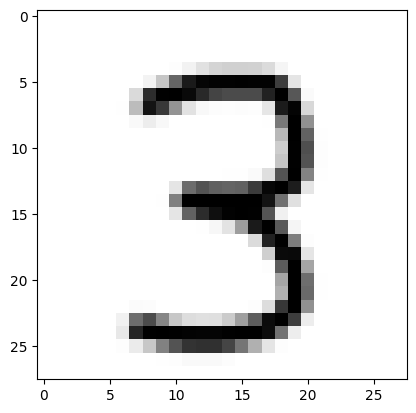

In [ ]:
# Display the first image in the dataset as an example
image_array = np.asfarray(our_own_dataset[0][1:]).reshape((28, 28))
plt.imshow(image_array, cmap='Greys', interpolation='None')

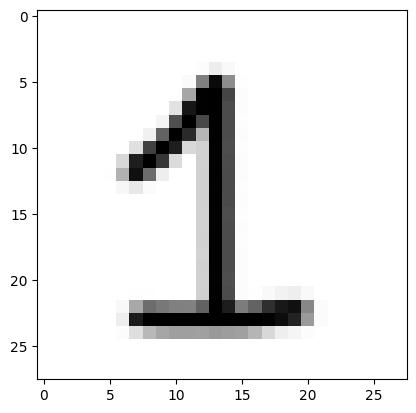

In [ ]:
# Display the second image in the dataset as an example
image_array = np.asfarray(our_own_dataset[1][1:]).reshape((28, 28))
plt.imshow(image_array, cmap='Greys', interpolation='None')